# Statistics, Tests, and Linear Regression

In [2]:
import numpy as np
import scipy.stats as spstats
import pandas as pd
from matplotlib import pyplot as plt

def make_hist_kde(ax : plt.Axes, d : pd.Series, c : str='#004400', left : bool = False, bin_div : int = 150):
    #customize ticks appearance
    ax.tick_params(axis='both',which='both',direction='in',bottom=True,top=True,left=True,right=True)
    ax.minorticks_on()
    
    #show grid
    ax.grid(True,which='minor',linestyle=':',alpha=0.6)
    ax.grid(True,which='major',alpha=0.6)
    
    #make kde
    kde = spstats.gaussian_kde(d)
    points = np.linspace(d.min(),d.max(),10000,endpoint=True)
    if left:
        ax.plot(kde.evaluate(points),points,color=c,label=d.name)
        ax.hist(d,bins=len(d)//bun_div,density=True,alpha=0.15,color=c,ec=c+'22',orientation='horizontal')
        ax.set_ylabel(d.name)
    else:
        ax.plot(points,kde.evaluate(points),color=c,label=d.name)
        ax.hist(d,bins=len(d)//bin_div,density=True,alpha=0.15,color=c,ec=c+'22')
        ax.set_xlabel(d.name)

## Statistics and Distributions

The basis for most statistical analysis is comparing the properties of a dataset to theoretical distributions. These are precisely-defined mathematical functions, and as we will see they provide a basis for us to compute the likelihood of obtaining a certain result by pure chance.

Before we get started though, a couple imporant caveats:
1. **Statistical analysis is not one-size-fits-all!** The various statistical tests we will discuss are based on certain assumptions about the "true" data that may not apply in all situations. We will only be showing tests based on the simplest possible cases, and before applying these tests to any real problem you should study them in much greater detail than we will do here. Doing bad statistical analysis is easy.
2. **Statistical analysis is descriptive, not expositive!** Statistics and statistical tests ultimately come down to different ways to describe data. They do not explain what the data mean, and they do not provide unambiguous truth. A $p$-value can tell the probability of obtaining a certain result if the null hypothesis is true, and is often used to reject the null hypothesis at some confidence level. However, it does not mean that a particular alternative hypothesis is correct!

As discussed in the week's introduction, the most common and powerful theoretical distribution function is the [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution):

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}\right] $$

where $\mu$ is the mean and $\sigma$ is the standard deviation ($\sigma^2$ is the variance). From a sample of the population, we can estimate the population mean with the *sample mean* $\bar{x}_s$, which may be different than the population mean. We can demonstrate the implications using functions in the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) module.

The [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function creates a normal distribution object, and there are a variety of functions for modeling the distribution or pulling random samples. For instance, to look at the probability density function, we can use `scipy.stats.norm.pdf`:

Text(0.4, 0.2519707245191434, '$\\sigma$')

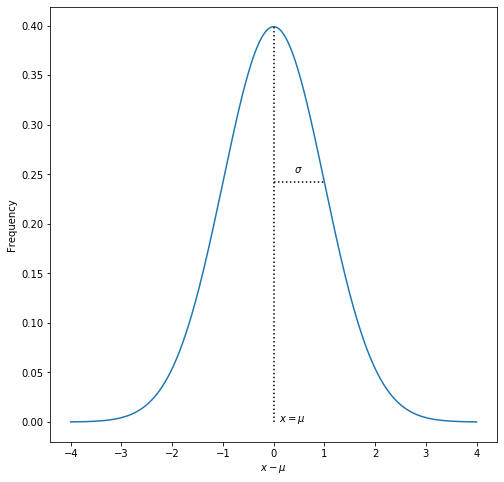

In [17]:
x = np.linspace(-4,4,1000)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x,spstats.norm.pdf(x))
ax.set_xlabel("$x - \mu$")
ax.set_ylabel("Frequency")
ax.plot([0,0],[0,spstats.norm.pdf(0)],'k:')
ax.plot([0,1],[spstats.norm.pdf(1),spstats.norm.pdf(1)],'k:')
ax.annotate('$x = \mu$',[0.1,0.0])
ax.annotate('$\sigma$',[0.4,spstats.norm.pdf(1)+.01])

For the standard normal distribution, $\mu = 0$ and $\sigma = 1$, but these can be changed with the `loc` and `scale` parameters:

In [ ]:
fig,ax = plt.subplots()
ax.plot(x,spstats.norm.pdf(x,loc=-0.5,scale=1.5))

We can take a sample of random numbers from a normal distribution using the `scipy.stats.norm.rvs` function (which can also accept `loc` and `scale` parameters if desired. Let's take a sample of 10 numbers from the normal distribution and calculate the sample mean and sample standard deviation.

In [ ]:
data = spstats.norm.rvs(size=10)
res = spstats.describe(data)
print(f'Mean: {res.mean}, StDev: {np.sqrt(res.variance)}')

The numbers you obtain will be random, but the mean is not exactly 0 and the standard deviation is not exactly 1. You will receive different results each time you run the cell. If you increase the `size` argument, the numbers you obtain will be closer to 0 and 1 more often, and if you decrease the size argument the values will be further from 0 and 1 more often.

It's natural, then, to want to know how the sample mean and sample standard deviation relate to the population mean and population standard deviation. Let's think first about the means. We can use `scipy.stats.norm.rvs` to repeat the above experiment many, many times, and we can plot the distribution of $\bar{x}_s$ values that we observe. This distribution can give us the answer to the question about how the sample mean relates to the population mean. We will do 4 quick experiments using the code in the next cell to see how the concepts are related, generating 4 plots.

### Plot 1

The first panel shows the distribution of $\bar{X}_s$ values, given the parameters `pop_mean`, `pop_sd`, and `sample_size`. With the standard values of 15 and 5 for the mean and standard deviation, a sample size of 5 results in the vast majority of sample means falling between 10 and 20: or within one standard deviation ($1\sigma$) of the true mean. If you adjust `sample_size`, the distribution will become wider or narrower.

### Plot 2

According to the central limit theorem, the average of a sample of random variables is itself a random variable, and it should also follow a normal distribution. We can relate the normal distribution of sample means to a "standard" normal distribution (with $\mu = 0$ and $\sigma=1$) by computing the scaled $z$ scores of the sample means:

$$ z = \frac{\bar{x}_s - \mu}{\sigma}\sqrt{N} $$

where $N$ is the sample size. The $z$ scores of the sample means are plotted in the second panel and compared to a standard normal distribution. You can see that the distribution is well-modeled by the normal distribution. The factor of $\sqrt{N}$ is a scaling factor that makes the width of the distribution equal to 1. Of course, the larger the value of $N$, the narrower the actual distrbution of $\bar{x}_s$ is.

### Plot 3

The problem with the $z$ score is that it depends on knowing the population standard deviation $\sigma$. Instead, we only know the population standard deviation

$$ S \equiv \frac{1}{\sqrt{N-1}}\sum_i \sqrt{(x_i - \bar{x}_s)^2} $$.

When we use the population standard deviation as an estimate of $\sigma$, we compute the scaled $t$ statistic:

$$ t = \frac{\bar{x}_s - \mu}{S}\sqrt{N} $$

Once again, the scaling factor $\sqrt{N}$ is used to rescale the width of the distribution to 1 so we can compare with a standardized distribution function. Panel 3 shows the comparison of the scaled $t$ statistic to the standard normal distribution. With the default `sample_size` of 5, you can see that the distribution of $t$ statistics is similar to the normal distribution, but the match isn't perfect. The normal distribution is taller and skinnier than the distribution of $t$ statistics. In other words, the scaled $t$ statistic has a greater probability of being farther from 0 than you would expect from a normal distribution.

### Plot 4

The real distribution function that describes the distribution of $t$ statistics is [Student's $t$ Distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution). This distribution has a parameter $\nu$ called "degrees of freedom", which is a positive integer that we will define later, and the probability density function is

$$ f(t) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)}\left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}} $$

where $\Gamma$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function). The Gamma function $\Gamma(x)$ is $(x-1)!$ for positive integers, but it is a smooth function that can also be evaluated for nonintegers.

We can model our scaled $t$ statitsic distribution with a Student's $t$ distribution with $\nu = N-1$. The $t$ distritution is available as `scipy.stats.t`, and it takes a parameter `df` to represent the degrees of freedom. The fourth plot compares our distribution of $t$ statistics to the $t$ distribution, and you can see that the agreement is excellent.

In [ ]:
x = np.linspace(0,30,10000,endpoint=True)
pop_mean = 15
pop_sd = 5
true_dist = spstats.norm(loc=pop_mean,scale=pop_sd)
sample_size = 5 # minimum: 4

data = true_dist.rvs(size=(10000,sample_size)) #create 10000 sets, each containing sample_size samples
m = pd.Series(np.mean(data,axis=1),name='$\\bar{x_s}$') # compute the sample means, store in Pandas series
sd = pd.Series(np.std(data,axis=1,ddof=1)) #compute the sample standard deviations, store in Pandas series

z = (m-pop_mean)*np.sqrt(sample_size)/pop_sd # compute scaled z score
z.name='z'
t = (m-pop_mean)*np.sqrt(sample_size)/sd # compute scaled t statistic
t.name='t'

#note: the standard error of the mean is sigma/sqrt(N) for population, and S/sqrt(N) for sample.
#it is equivalent to calculate t = (m-pop_mean)/spstats.sem(data,axis=1)

fig,axes = plt.subplots(1,4,figsize=(15,3.5))
x2 = np.linspace(-5,5,10000,endpoint=True)

#Plot 1: distribution of sample means
make_hist_kde(axes[0],m)
axes[0].set_title('$\\bar{x}_s$')
axes[0].legend()

#Plot 2: distribution of scaled z scores
make_hist_kde(axes[1],z)
axes[1].plot(x2,spstats.norm.pdf(x2),'k--',label='norm(0,1)')
axes[1].set_xlabel("z")
axes[1].set_title('Z scores of $\\bar{x}_s$')
axes[1].legend()

#Plot 3: distribution of scaled t statistics, compared with normal distribution
make_hist_kde(axes[2],t)
axes[2].plot(x2,spstats.norm.pdf(x2),'k--',label='norm(0,1)')
axes[2].set_xlabel("t")
axes[2].set_title('t statistics of $\\bar{x}_s$')
axes[2].set_xlim(-5,5)
axes[2].legend()

#Plot 4: distribution of scaled t statistics, compared with t distribution
make_hist_kde(axes[3],t)
axes[3].plot(x2,spstats.t.pdf(x2,df=sample_size-1),'k--',label=f't(0,1,df={sample_size-1})')
axes[3].set_xlabel("t")
axes[3].set_xlim(-5,5)
axes[3].set_title('t statistics of $\\bar{x}_s$')
axes[3].legend()

The $t$ distribution approaches the normal distribution as $\nu\to\infty$:

In [ ]:
fig,ax = plt.subplots()
x = np.linspace(-5,5,10000,endpoint=True)
for df in [3,5,10,50,100]:
    ax.plot(x,spstats.t.pdf(x,df=df),alpha=0.5,label=f't $\\nu$={df}')
ax.plot(x,spstats.norm.pdf(x),'k--',label='Normal')
ax.legend()

## Cumulative Distribution Functions and Confidence intervals

The vast majority of the time, we do not know the population mean, so we cannot truly calculate the $t$ statistic for our sample. However, the $t$ distribution gives us the theoretical distribution of $t$ values that we might expect to observe for any assumed population mean. Let's consider the scaled $t$ statistics with $\nu=4$, as we plotted above. The $t$ distribution is getting pretty small when $t < -3$ and $t > 3$. Another way of visualizing the disrtibution of $t$ statistics is with the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function), which tells what fraction of values in the distribution are less than or equal to a given value $x$. In `scipy.stats`, all of the continuous distributions are subclasses of the [`scipy.stats.rv_continous`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html) class, and there are a variety of functions we can call (we've already seen [`rv_continuous.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.pdf.html) and [`rv_continous.rvs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html)). The cumulative distribution function is [`rv_continuous.cdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.cdf.html), which we plot below. Another useful function is [`rv_continuous.interval`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.interval.html), which takes an argument `alpha` and returns the range containing 100*`alpha`% of the values in the distribution, centered around the median. Below we show that 95% of scaled $t$ values fall between -2.777 and +2.777 for $\nu=4$ (i.e., $N=5$).

In [ ]:
fig, ax = plt.subplots()
ax.plot(x2,spstats.t.cdf(x2,df=4))

# get the range that contains the central 95% of possible values
# in other words, at what t values is CDF equal to 0.025 to 0.975 (0.975 - 0.025 = 0.95)
iv = spstats.t.interval(alpha=0.95,df=4)
print(iv)

ax.plot([iv[0],iv[0]],[-0.5,1.5],'k:')
ax.plot([iv[1],iv[1]],[-0.5,1.5],'k:')
ax.plot([-5,5],[0.025,0.025],'k:')
ax.plot([-5,5],[0.975,0.975],'k:')
ax.set_ylim(0,1)
ax.set_xlim(-5,5)
ax.set_xlabel('$t$')
ax.set_ylabel('CDF')

Putting all this together, assume we have collected 5 samples ($N=5$) and calculated the sample mean $\bar{x}_s$. We do not know the true population mean, and therefore we do not know the true $t$ statistic for our sample mean, but we know that 95% of the time the scaled $t$ statistic for the sample mean of 5 samples falls within the range \[-2.777,2.777\]. If we assume that the scaled $t$ statistic for our data set is in this range, then we can solve for the range of the population mean. Since

$$ t = \frac{\bar{x}_s - \mu}{S}\sqrt{N} $$

if we assume a value of $t$, we can solve for $\mu$ easily:

$$ \mu = \frac{St}{\sqrt{N}}(\bar{x}_s - t) $$

Plugging in +2.777 and -2.777 would yield the range of population means that are possible under the assumption that the scaled $t$ statistic is within the 95% most likely values. This is an example of a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval), and in particular, a 95% confidence interval.

This is a place where it pays to be very careful about how you interpret statistics. A 95% confidence interval **does not imply** that there is a 95% chance that the population mean lies within that range. Since the confidence interval is calculated for a particular set of samples, the population mean is either inside the range or outside; there is no longer any "chance." The correct interpretation is that if the same experiment were repeated many, many times, each with a different set of $N$ independent samples, 95% of the calculated confidence intervals would contain the true population mean. However, there is no way of knowing whether any one particular sample contains the mean within its confidence interval. Let's show how to calculate the 95% confidence interval in python and then perform this experiment!

The `scipy.stats.t` distribution and its subfunctions can take `loc` and `scale` parameters that can set the central value and the width of the distribution. The correct scaling factor for a set of samples is $S/\sqrt{N}$, which is equivalent to the standard error of the mean ([`scipy.stats.sem`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)). When setting `loc` to the sample mean and `scale` to the standard error of the mean, the $t$ distribution is scaled to the measurement, and the `interval` function directly gives the desired confidence interval. In the code below, you can adjust the number of trials, the desired confidence interval, and the sample size. The code computes the sample mean and confidence interval for each trial, and then computes how often the population mean is contained within the confidence interval.

In [ ]:
x = np.linspace(0,30,10000,endpoint=True)
trials = 100
pop_mean = 15
pop_sd = 5
true_dist = spstats.norm(loc=pop_mean,scale=pop_sd)
sample_size = 5 # minimum: 4
conf_interval = 0.95

data = true_dist.rvs(size=(trials,sample_size))
m = pd.Series(np.mean(data,axis=1),name='$\\bar{x_s}$') # compute the sample means, store in Pandas series
sd = pd.Series(np.std(data,axis=1,ddof=1)) #compute the sample standard deviations, store in Pandas series
sem = pd.Series(spstats.sem(data,axis=1)) #compute standard error of mean (=S/sqrt(N)), ddof is assumed to be 1 for scipy.stats functions

conf = spstats.t.interval(alpha=conf_interval,df=sample_size-1,loc=m,scale=sem)

#since the interval is symmetric, we can represent the confidence interval as m-lower confidence bound
#using this as a symmetric error bar in a plot will visualize the range spanned by the confidence interval
errorbar = pd.Series(m - conf[0])

#only try to plot if there are 250 or fewer trials... otherwise can't read the plot anyways
if trials <=250:
    ax = m.plot(yerr=errorbar,ls='',marker='o',figsize=(16,4)) #using Series.plot from pandas to quickly plot error bars
    ax.plot([0,len(m)],[pop_mean,pop_mean],'k--') #show population mean
    ax.set_xlabel('Trial')
    ax.set_ylabel(f'$\\bar{{x}}_s$ with {conf_interval*100}% CI')

#now compute what fraction of confidence intervals contain the true mean
d = np.where(np.logical_and(pop_mean <= conf[1],pop_mean >= conf[0]),np.ones(len(m)),np.zeros(len(m)))
print(f'Mean is in {np.sum(d)}/{len(d)} ({np.sum(d)/len(d)*100}%) of calculated confidence intervals')



## Distributions of real data

Another use of theoretical distributions is that they give us a language for explaining and comparing experimental datasets. When the statistics of an experimentally measured variable differ significantly from a normal or $t$ distribution, this may indicate that there may be distinct populations in the dataset that arise from separate distributions. We will illustrate this with NHANES height data. The BMXHT column gives the height of the subject in cm. We can load the dataset from last time, and plot the distribution of heights of people age 18-65.

In [ ]:
df = pd.read_hdf('nhanes.hd5','df')

fig, ax = plt.subplots()
ht = df[df.RIDAGEYR.ge(18) & df.RIDAGEYR.le(65)].BMXHT.dropna()
make_hist_kde(ax, ht)

In [ ]:
ht.describe()

If we did not look at the data visually and just relied on the simple statistics given in the output of the `describe` function, we may not immediately realize that the data do not match well to a normal distribution.

In [ ]:
fig, ax = plt.subplots()
make_hist_kde(ax, ht)

x = np.linspace(138,198,1001,endpoint=True)
ax.plot(x,spstats.norm.pdf(x,loc=ht.mean(),scale=ht.std()),'k--')

It is often useful to calculate higher moments (skew and kurtosis), and compare those to the normal distribution (which has skew = 0 and "excess kurtosis" = 0, where excess kurtosis is just 3 - kurtosis).

In [ ]:
print(spstats.norm.stats(loc=ht.mean(),scale=ht.std(),moments='mvsk'))
print(spstats.describe(ht,bias=True,ddof=1))

The positive skewness tells us that the distribution is "heavier" on the left and has a longer tail on the right compared with a symmetric distribution, and the negative kurtosis indicates that, compared with a normal distribution, the data has fewer points lying far from the mean than we would expect. The [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) uses the sample skewness and kurtosis to test whether a dataset is distinguishable from a normal distribution. The test is imperfect, and only works well for large sample sizes ($N > 2000$), but it can be used here. The test is implemented as [`scipy.stats.jarque_bera`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html), and it returns a tuple containing the test statistic and the p-value. The null hypothesis is that the dataset is normally-distributed, so a small p-value indicates that this is unlikely. Our dataset gives a p-value of 3e-12, so it is extremely unlikely that the data make a normal distribution.

In [ ]:
print(f'p = {spstats.jarque_bera(ht)[1]}')

Since height should be a random variable, seeing such a low p-value suggests that we should search for an alternative hypothesis to explain why it does not appear to be. One reasonable hypothesis is that the average heights of men and women are different, and we can use statistical anaylsis to explore this hypothesis. First, we can extract the heights of men and women into separate datasets, and look at their basic statistics.

In [ ]:
adults = df[df.RIDAGEYR.ge(18) & df.RIDAGEYR.le(65)].copy()
men = adults[adults.RIAGENDR.eq('Male')].BMXHT.dropna()
men.name='Men'
women = adults[adults.RIAGENDR.eq('Female')].BMXHT.dropna()
women.name='Women'
pd.concat([men,women],axis=1).describe()

Now we can plot the distributions of men and women. On the plot below, we show each histogram and kernel density estimate, along with the normal distribution that approximates the entire dataset, and normal distributions that approximate the men and women. The overall normal distribution is multiplied by 2 because each subset (men and women) are each scaled to have area = 1, so multiplying the total by 2 puts the total on the same scale. Alternatively, we could have scaled each of the histograms according to the fraction of the sample that men and women comprise.

In [ ]:
fig,ax = plt.subplots()
make_hist_kde(ax,men,'#000044',bin_div=50)
make_hist_kde(ax,women,'#440000',bin_div=50)
nm = spstats.t(df=len(men)-1,loc=men.mean(),scale=men.std())
nw = spstats.t(df=len(women)-1,loc=women.mean(),scale=women.std())
ax.plot(x,nm.pdf(x),c='#000044',ls='--',label='Norm Men')
ax.plot(x,nw.pdf(x),c='#440000',ls='--',label='Norm Women')
ax.plot(x,2*spstats.norm.pdf(x,loc=ht.mean(),scale=ht.std()),'k:',label='Norm All')
ax.set_xlabel('Height (cm)')
ax.legend()


For each of these subsets, we can compute the higher order moments and perform the Jarque-Bera test. The distributions both visually look similar to normal distributions, except perhaps that in the sample of women there may be a long tail toward greater height (positive skewness). The Jarque-Bera tests suggest that both distributions are not very likely to be different from a normal distribution, though the p-value for women is on the lower side.

In [ ]:
print(f'Men: {spstats.describe(men)}')
print(f'Women: {spstats.describe(women)}')
print(f'Men, p = {spstats.jarque_bera(men)[1]}. Women, p = {spstats.jarque_bera(women)[1]}')

Since each of these datasets represents a sample of men or women, we can compute 95% condifence intervals for the mean height using the $t$ distribution.

In [ ]:
men_ci = spstats.t.interval(0.95, len(men)-1, loc=men.mean(), scale=spstats.sem(men))
women_ci = spstats.t.interval(0.95, len(women)-1, loc=women.mean(), scale=spstats.sem(women))

print(f'Men: {men_ci[0]:.3f} - {men_ci[1]:.3f} cm, {men.mean():.3f} +/- {men_ci[1]-men.mean():.3f} cm')
print(f'Women: {women_ci[0]:.3f} - {women_ci[1]:.3f} cm, {women.mean():.3f} +/- {women_ci[1]-women.mean():.3f} cm')

## Hypothesis testing

In science, hypothesis testing is one of the most common uses of statistical analysis. There are many, many different kinds of statistical tests (we have already seen the Jarque-Bera test, for instance), but they all involve assuming that certain aspects of sampled data will be represented by theoretical distributions. Under that assumption, a statistic is calculated for the dataset and compared to the properties of the theoretical distribution, which yields a p-value. Here we will look at a few of the more common statistical tests.

### $t$-tests

The $t$ tests are a family of methods based on the $t$ statistic. The null hypothesis is that a set of samples is drawn from a normal distribution, and therefore that the sample mean follows the $t$ distribution. There are many types of $t$ tests:

- **One-sample** $t$ tests check if the population mean is equal to a specified value. With a p-value of 0.05, this is equivalent to asking whether the assumed population mean lies within the computed 95\% condifence interval.
- **Two-sample** $t$ tests check whether two sets of samples come from the same distribution.
- **One-sided**, **two-sided**, **paired**, and **unpaired** $t$ tests will be discussed a bit later once we've established the basics.

A one-sample $t$ test can be performed with the [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) function. We provide the data and the assumed population mean, and the function computes the $t$ statistic as we did before, returning both $t$ and the associated $p$-value from the cumulative distribution function. For instance, we could test whether the population mean for men is 173 cm at a significance level of 95% (p < 0.05). The null hypothesis is that our sample is indistinguishable from a population mean of 173 cm. The computed $t$ value is 7.19, which corresponds to a p value of 9e-13. This means that if the average height of men is really 173 cm, then if we randomly sample 1985 men over and over again independently, we would only get a sample mean that is different from 173 cm by an amount equal or greater than our observed sample mean ($|173 - 174.2| = 1.2$ cm) at a rate less than 1 time in every 1,200,000,000,000 trials if it is indeed true that the population mean is 173 cm and the population variance is well-approximated by the sample variance. At a significance level of 95% (p < 0.05), then, we can reject the null hypothesis.

In [ ]:
spstats.ttest_1samp(men,173)

Importantly, the statement above does not mean that there is only a 9e-13 chance that the population mean is 173 cm! If for some reason our sample happens to have a smaller variance than the true population variance, then our esimate of the population variance is poor, and our calculated confidence interval shrinks. If you go back above to the plot of confidence intervals, you can see that sometimes the computed confidence interval is very small. This occurs when the values of the samples just happen to be close together, and this can occur by chance. In a single trial, you have no way of knowing if this is the case for your data. This is why the p-value should not be interepreted as a probability. The proper use of a statistical test is to establish a significance level that is acceptable before the experiment is performed. If the computed p value is smaller than the threshold significance level, then the null hypothesis can be rejected. Sometimes, the null hypothesis will be falsely rejected. By choosing a significance level of 95%, it means if the null hypothesis is actually true, you will falsely reject it once out of every 20 repeat tests. The appropriate significance level depends on the application: especially what the potential harm might be if you falsely reject the null hypothesis. If it's a life-or-death scenario, perhaps you want a 99.995% significance level or higher, but if there's little harm in being wrong, maybe a 90% significance level is acceptable.

A two-sample $t$ test can be used to compare the sample means for 2 groups: such as height data for men and women. The null hypothesis is that the population mean is equal for the groups. For our data, the two-sample $t$ test imagines the following scenario: assume we were to take samples of 2197 women and 1985 men randomly from the population many, many times. Each time we calculate the sample means. How often would we find a difference between the two that is just as large (or larger) as the one we observed in our real sample if the population means are actually the same? The $t$ statistic is computed by dividing the difference of the sample means by the standard error of the difference. In the classical [Student's $t$ test](https://en.wikipedia.org/wiki/Student%27s_t-test), the calculation is:

$$ t = \frac{\bar{x}_{s,1} - \bar{x}_{s,2}}{ \sqrt{\frac{S_1^2 + S_2^2}{2}}\sqrt{\frac{2}{N}}} $$

However, this test assumes that $N_1 = N_2 = N$ and that $S_1^2 \approx S_2^2$. Student's $t$ test can only be used when the sample sizes are equal and their variances are very similar. Forunately, there is an improved version called [Welch's $t$ test](https://en.wikipedia.org/wiki/Welch%27s_t-test) that does away with these assumptions by rescaling the sample variances by the sample sizes:

$$ t = \frac{\bar{x}_{s,1} - \bar{x}_{s,2}}{\sqrt{\frac{S_1^2}{N_1} + \frac{S_2^2}{N_2}}} $$

Either way, we then compare the $t$ statistic to the $t$ distribution, yielding a $p$ value based on its cumulative distribution function. Welch's $t$-test is superior to Student's $t$ test and is more generally applicable, so it should always be preferred.

The entire two-sample $t$ test is done by the [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function. It takes two datasets as arguments. In addition, there is an `equal_var` argument. If `equal_var=True` (the default), then Student's $t$ test is performed. When `equal_var=False`, it's Welch's $t$ test. In practice, it should always be set to `False`. Applying this test to our samples we get a $t$ statistic of 60.2, which corresponds to a p value that is smaller than the smallest floating point number that can be represented. This is as close to conclusive as it is possible to be with statistics. No matter what significance level we had initially chosen, the null hypothesis would be rejected.

In [ ]:
spstats.ttest_ind(men,women,equal_var=False)

Unfortunately, the $t$ test built into `scipy.stats` isn't very descriptive. It only reports the value of the statistic and the p value. There is a fairly new python statstics package called [`pingouin`](https://pingouin-stats.org/index.html) that builds on `scipy.stats` and `pandas`. The [`pingouin.ttest`](https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest) function combines all of the functionalities of the $t$ test functions in `scipy.stats` into a convenience interface. In addition, it automatically chooses Welch's $t$ test when appropriate. The output is a `pandas.DataFrame` containing the results of the statistical test. You can see that it tell you the test is two-sided (discussed more below), and you get the 95% confidence interval by default along with a couple of other parameters.

In [ ]:
import pingouin as pg

pg.ttest(men,women)

Let's do a test that is a bit less obvious. We can compare men's and women's blood sodium levels (LBXSNASI, mmol/L). We'll show the results from both `scipy.stats.ttest_ind` and `pingouin.ttest`.

In [ ]:
na_all = df[df.RIDAGEYR.ge(18) & df.RIDAGEYR.le(65)].LBXSNASI.dropna()
na_all.name='All'
na_men = df[df.RIDAGEYR.ge(18) & df.RIDAGEYR.le(65) & df.RIAGENDR.eq('Male')].LBXSNASI.dropna()
na_men.name='Men'
na_women = df[df.RIDAGEYR.ge(18) & df.RIDAGEYR.le(65) & df.RIAGENDR.eq('Female')].LBXSNASI.dropna()
na_women.name='Women'

print(f'All : {spstats.describe(na_all)}')
print(f'Men : {spstats.describe(na_men)}')
print(f'Women : {spstats.describe(na_women)}')

fig, axes = plt.subplots(1,2,figsize=(10,5))
make_hist_kde(axes[0],na_all,bin_div=300)
axes[0].set_xlabel('[Na], mmol/L')
axes[0].legend()
make_hist_kde(axes[1],na_men,'#000044',bin_div=200)
make_hist_kde(axes[1],na_women,'#440000',bin_div=200)
axes[1].set_xlabel('[Na], mmol/L')
axes[1].legend()

print(spstats.ttest_ind(na_men,na_women,equal_var=False))
pg.ttest(na_men,na_women)

Here we obtain a p value of 0.01, and we can reject the null hypothesis at a 95% significance level. Had we chosen a significance level of 99%, we would not reject the null hypothesis.

So far, our two-sample $t$ tests have been testing whether the sample means are different. This means we have been doing a **two-sided** or **two-tailed** $t$ test. Another way of performing a $t$ test is to ask whether one sample mean is *greater than* the other: a **one-sided** or **one-tailed** $t$ test. Consider a test at the 95% significance level. Our cumulative distribution function with the 95% condifence level is shown again below:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x2,spstats.t.cdf(x2,df=4))

# get the range that contains the central 95% of possible values
# in other words, at what t values is CDF equal to 0.025 to 0.975 (0.975 - 0.025 = 0.95)
iv = spstats.t.interval(alpha=0.95,df=4)
print(iv)

ax.plot([iv[0],iv[0]],[-0.5,1.5],'k:')
ax.plot([iv[1],iv[1]],[-0.5,1.5],'k:')
ax.plot([-5,5],[0.025,0.025],'k:')
ax.plot([-5,5],[0.975,0.975],'k:')
ax.set_ylim(0,1)
ax.set_xlim(-5,5)
ax.set_xlabel('$t$')
ax.set_ylabel('CDF')

In a two-tailed test at 95% significance, we consider the result significant (null hypothesis rejected) if the $t$ value falls outside the range indicated by the box in the plot above: if the $t$ statistic is in the lowest 2.5% of values or the highest 2.5% of values. What if, instead, we want to test the hypothesis that the mean of one group is greater than the other at 95% significance? This means that the result is significant if $t$ is in the top 5% of possible values:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x2,spstats.t.cdf(x2,df=4))

# get the range that contains the central 95% of possible values
# in other words, at what t values is CDF equal to 0.025 to 0.975 (0.975 - 0.025 = 0.95)
iv = spstats.t.interval(alpha=0.90,df=4)

print(iv[1])
ax.plot([iv[1],iv[1]],[-0.5,1.5],'k:')
ax.plot([-5,5],[0.0,0.0],'k:')
ax.plot([-5,5],[0.95,0.95],'k:')
ax.set_ylim(0,1)
ax.set_xlim(-5,5)
ax.set_xlabel('$t$')
ax.set_ylabel('CDF')

Now we would reject the null hypothesis if $t > 2.13$, whereas before we would reject it if $|t| > 2.777$. We're only considering results along one tail of the distribution. If instead we were testing the hypothesis that the mean of one group is *less than* the other, we would use the other tail of the distribution and reject the null hypothesis if $t < 2.13$.

All of the $t$ tests in `scipy.stats` are **two-sided**. However, it is easy to convert the $p$ value for a 2-sided test to a 1-sided one: divide $p$ by 2, then depending on the sign of $t$, potentially compute $1-p$. Let `t` and `p` be the result for the two-sided $t$ test `ttest_ind(a,b)`. The convention for `ttest_ind(a,b)` is that the t statistic is positive if the sample mean of `a` is greater than that of `b`. So depending on the hypothesis and the sign of $t$, the one-sided p values are:

| Hypothesis | `t` | One-sided p value |
| --- | --- | --- |
| a > b | >0 | `p`/2 |
| a > b | <0 | 1 - (`p`/2) |
| a < b | >0 | 1 - (`p`/2) |
| a < b | <0 | `p`/2 |

Alternatively, you can always just place the group with the greater hypothesized mean first. So if you are testing `a < b`, then you can compute `ttest_ind(b,a)`, and the one-sided p value is `p`/2 (becuase the computed `t` value will have the opposite sign of `ttest_ind(a,b)`).

So if our hypothesis is that women have greater blood sodium levels than men, we could do either of the following:

In [ ]:
t,p = spstats.ttest_ind(na_women,na_men,equal_var=False)
p = p/2
if t < 0.0:
    p = 1-p
print(f't = {t:.3f}, p = {p:.3f}')

t,p = spstats.ttest_ind(na_men,na_women,equal_var=False)
p = p/2
if t > 0.0:
    p = 1-p
print(f't = {t:.3f}, p = {p:.3f}')

Alternatively, using `pingouin` we can simply tell it that we want a one-tailed test evaluating the greater tail of the distribution:

In [ ]:
pg.ttest(na_women,na_men,tail='greater')

Here we would **not** reject the null hypothesis, while if we did the opposite test (hypothesizing that men have greater blood sodium levels than women), we would reject it even at the 99% significance level. The results of the opposite test are:

In [ ]:
t,p = spstats.ttest_ind(na_men,na_women,equal_var=False)
p = p/2
if t < 0.0:
    p = 1-p
print(f't = {t:.3f}, p = {p:.3e}')

pg.ttest(na_women,na_men,tail='less')

Here it is very important to emphasize that **hypotheses and significance levels MUST be decided upon BEFORE the experiment!** As you can see, depending on the hypothesis chosen and the type of test performed, it is possible to obtain may different p values. In some fields, a standard has evolved that in order for an experiment to be publishable, the results must be significant at the 95% level, and therefore the p value must be below 0.05. It could be tempting to start with a two-tailed $t$ test, obtain a p value of 0.07, and then switch to a one-tailed $t$ test that would decrease the p value to 0.035, meeting the standard for publication. This is not only scientifically invalid, it is scientific misconduct: manipulating the data to obtain a favorable result. Because of the perverse incentived surrounding p < 0.05, journals are moving away from this hard threshold and instead preferring that p-values are reported along with confidence intervals so that reviewers (and readers) can judge for themselves how significant the results are. Depending on how extraordinary the claim is, reviewers may demand greater or lesser significance levels.

Finally, $t$ tests may also be **paired** or **unpaired**. The tests we have done are unpaired because the members of both groups are different. If, however, both groups consisted of the same individuals, then a paired $t$ test is needed. These are typically used to assess whether observed data for a group changes over time. For instance, if you were testing a weight-loss treatment, you might record the participants' weights before and after the treatment. The $t$ test is then performed using the difference in weight between the two samples, and the null hypothesis is that the average change in weight is 0 (e.g., similar to a one-sample $t$ test compared to 0). If you were testing for weight loss, you might choose to use a one-sided $t$ test to see if the average weight change is negative at your desired level of significance. The [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) function is used to perform a paired $t$ test. In `pingouin`, it is done by setting the `paired=True` argument.

### ANOVA (Analysis of Variance)

While $t$ tests are good for determining whether there is a significant difference between the means of two groups, in some cases you may have more than 2 groups to compare. For example, we could break down the height data by both gender and race/ethnicity (RIDRETH3). We can once again use the `DataFrame.groupby` function to obtain a summary and a visualization of the data.

In [ ]:
adults.groupby(['RIDRETH3','RIAGENDR']).BMXHT.describe()

In [ ]:
adults.groupby(['RIDRETH3','RIAGENDR']).BMXHT.plot.hist(bins=50,alpha=0.3,figsize=(12,8))
plt.legend()

If we want to know whether there are significant height differences among these groups at the 95% significance level, you might initially think to just do a $t$ test between each combination of categories. However, doing this comes with a problem. Assume for a moment that the null hypothesis is true, and that all groups come from the same normal distribution. We have 6 ethnicities and 2 genders for a total of $G=12$ groups, so to test every combination requires $G(G-1)/2$ = 66 tests. Since a 95% significance $t$ test has a 5% false positive rate, in 66 tests you would expect 3-4 false positive results even if the null hypothesis is true. The odds of getting at least one false positive in 66 tests at the 95% significance level is:

In [ ]:
print(f'{(1 - (0.95**66)) *100:.1f}%')

The [one-way ANOVA](https://en.wikipedia.org/wiki/One-way_analysis_of_variance) (Analysis of Variance) test is designed for this case. Instead of directly comparing the means, the ANOVA test, as the name implies, analyzes the *variance* of the data. The central insight is that if all of the data comes from the same distribution, then the variance of the entire data set should be indistinguishable from the variances that are calculated when the data are partitioned into groups and compared to the within-group means. 

The process works by first calculating the global mean and the means of each group. The sum of the squares of the differences between each group's mean and the global mean is then calculated. Then, the unscaled variance within each group is calculated, and these are added together for each group to give the total "within-group" unscaled variance. These unscaled variances are then divided by the number of degrees of freedom for each calculation (for the global mean, it is the number of groups minus 1, and for the within-group variance it is the total number of data points minus the number of groups) to give the global and within-group **mean-square** variances (MSVs). The ratio of the global MSV to the within-group MSV is called the **$F$-ratio**, which can then be compared to the cumulative distribution function of the [$F$-distribution](https://en.wikipedia.org/wiki/F-distribution) to calculate the ANOVA test statistic and p-value. For ANOVA, the null hypothesis is that all groups have the same mean, so a low p-value indicates that at least one group has a significantly different mean than the others.

Because we already know from a $t$ test that there is a big difference between men and women as a whole, we'll limit our analysis to only men here. First we'll visualize the data as a boxplot.

In [ ]:
men = adults[adults.RIAGENDR.eq('Male')]
men.boxplot(column='BMXHT',by='RIDRETH3',figsize=(12,5.5))

Here we can see that Mexican American, Other Hispanid, and Non-Hispanic Asian groups are close together, and Non-Hispanic White, Non-Hispanic Black, and Other groups are close. Since we can make this judgement by eye, we might suspect that an ANOVA test should give a low p-value. We can run an ANOVA test on a `pandas.DataFrame` with the [`pingouin.anova` function](https://pingouin-stats.org/generated/pingouin.anova.html), which returns another DataFrame containing the test results.

In [ ]:
pg.anova(men,dv='BMXHT',between='RIDRETH3')

As expected, we obtain a very low p-value, which tells us that there are significant differences between the means, though it does not tell us which means are the ones that are different than the others. Once the ANOVA confirms that some means are different, post-hoc analysis can be performed. The [`pingouin.pairwise_tukey`](https://pingouin-stats.org/generated/pingouin.pairwise_tukey.html) test is one such post-hoc test that can be used for this purpose, which computes a corrected $t$ statistic that avoids the problems with pairwise $t$ tests because is uses the MSV for the total dataset rather than just the pairs under consideration.

In [ ]:
pg.pairwise_tukey(men,dv='BMXHT',between='RIDRETH3')

A quick aside-- when developing this notebook, there was a bug in `pingouin` as of version 0.3.6 that caused the group labels to become scrambled in the output of the `pairwise_tukey` function when the `between` column contained categorical data, rather than `int` or `string`. It is important to use caution when working with code that is under active development, but one of the cool things about open source software is that a bug like this can be [reported and fixed](https://github.com/raphaelvallat/pingouin/issues/111). Versions 0.3.7+ of `pingouin` no longer have this bug.

As a final note on $t$ tests, the [`pingouin.pairwise_ttests` function](https://pingouin-stats.org/generated/pingouin.pairwise_ttests.html#pingouin.pairwise_ttests) can perform multiple $t$ tests between different groups, and has a variety of p-value correction algorithms that attempt to compensate for the false positive rate. 

In [ ]:
pg.pairwise_ttests(men,dv='BMXHT',between='RIDRETH3',padjust='fdr_bh',alpha=0.05)

## Correlation analysis and linear models

Other common statistical analyses involve looking for relationships between different variables. A **correlation analysis** examines whether the values of two variables change together. Given two variables A and B, if greater values of A correspond to greater values of B, they are positively correlated, and if greater values of A are associated with lower values of B, they are negatively correlated. To start by example, consider an adult's weight and height. Intuitively, it seems that taller people should on average weigh more. We can visualize the relationship with a scatter plot:

In [ ]:
adults.plot.scatter(x='BMXHT',y='BMXWT',s=2)

We do see that weight does generally increase with increasing height, and that by eye it seems that there is a positive correlation. To quantify this, we can calculate [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) $r$, which is the ratio of the covariance between the two variables to the product of each variable's variance:

$$ r = \frac{ \sum_i(x_i - \bar{x})(y_i-\bar{y}) }{\sqrt{\sum_i(x_i - \bar{x})^2}\sqrt{\sum_i(y_i - \bar{y})^2}} $$

The possible values of $r$ range from +1 (points form a perfect line with a positive slope) to $-1$ (points form a perfect line with a negative slope). Pearson's $r$ coefficient can be calculated with the [`pingouin.corr`](https://pingouin-stats.org/generated/pingouin.corr.html) function. Conveniently, this function discards any (x,y) pairs in which either x or y is NaN:

In [ ]:
pg.corr(adults.BMXHT,adults.BMXWT)

Here we see that the value of $r$ is 0.419, which indicates a positive correlation. However, it is important to consider whether this value is significantly different from 0. It turns out that the variable

$$ \sqrt{\frac{n-2}{1-r^2}} $$

follows a $t$ distribution with $n-2$ degrees of freedom ($n$ = number of samples), so we can construct 95% confidence intervals and perform significance tests using the cumulative distribution function. By default, `pingouin.corr` returns the 95% condifence interval for the value of $r$ and computes the p value for the null hypothesis that $r=0$. In this case, the p-value is 1.3e-177, which very strongly suggests that the observed correlation is significant.

In addition, the function returns $r^2$, which under normal circumstances can be interpreted as the fraction in the variance of y that can be explained by the expected value of x. We will discuss this more below in the context of linear regression.

Pearson's $r$ coefficient is the most common correlation coefficient, but others have been developed that overcome some if its limitations. First, the $r$ coefficient is not **robust**: it is very sensitive to outlier datapoints, which contribute large factors to the summations. It also only attains a value of $\pm1$ in the limit that the relationship between the variables is linear. It is also possible for the data to be perfectly correlated if, for instance, $y = x^2$ for $x>0$. In that case greater $x$ always leads to greater $y$, but the relationship is not linear so $r < 1$. Another common non-robust correlation measure is [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) $r_s$. This coefficient is calculated the same as Pearson's coefficient, but instead the raw data values are replaced with their rank (i.e., the lowest value has rank 1, the next lowest rank 2, and so on). Spearman's coefficient is +1 if the value of y always increases with x, no matter what the functional form of the relationship is, and is -1 if the value of y always decreases with x. Spearman's coefficient can be calculated by passing the `method='spearman'` argument to the `pingouin.corr` function:

In [ ]:
pg.corr(adults.BMXHT,adults.BMXWT,method='spearman')

For this dataset, both $r$ and $r_s$ are similar, but $r_s$ is less sensitive to outliers. Pearson's $r$ should be preferred when you want to specifically explore a linear relationship and have no major outliers, and Spearman's $r_s$ should be used if you do not care about whether the relationship is linear but only whether the variables are related by any monotonic function. Other methods are available as well; see the `pingouin.corr` documentation for a list.

Pingouin also provides a [`pingouin.pairwise_corr`](https://pingouin-stats.org/generated/pingouin.pairwise_corr.html) function that allows multiple correlations to be computed at once. Let's compare weight, height, and family income relative to poverty (`INDFMPIR`). The latter column is capped at 5, so someone with an income 10 times the poverty level would be 5. The [`pandas.plotting.scatter_matrix`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) function generates a grid of scatter plots between columns, with either kernel density estimates or histograms on the diagonal.

In [ ]:
pd.plotting.scatter_matrix(adults.loc[:,['BMXHT','BMXWT','INDFMPIR']],diagonal='kde')

In [ ]:
pg.pairwise_corr(adults,['BMXHT','BMXWT','INDFMPIR'],method='pearson',padjust='fdr_bh')

Here we see that the $r$ value for the correlation between weight and income is very close to 0, and the p-value is 0.67, so at the 95% significance level we cannot say there is any correlation at all. However, there is a nonzero correlation between height and income at the 95% significance level. In popular media, this would likely be reported by saying that "taller people make more money because there is a significant correlation between income and height." But even though the correlation coefficient is slightly positive, the $r^2$ value suggests that income accounts for 0.6% of the variance in height, so if there is a "real" effect, it is extremely small.

Let's look at some data that are more relevant for chemistry. Is there a correlation between blood triglyceride (LBXSTR) and cholesterol (LBXSCH)?

In [ ]:
pg.corr(adults.LBXSCH,adults.LBXSTR)

In [ ]:
pg.corr(adults.LBXSCH,adults.LBXSTR,method='spearman')

Correlation analysis suggests that there is a relationship. We can do a **linear regression** analysis to determine the slope and intercept that gives a best-fit linear equation for cholesterol as a function of triglyceride level using the [`pingouin.linear_regression`](https://pingouin-stats.org/generated/pingouin.linear_regression.html) function.

In [ ]:
fit = pg.linear_regression(adults.LBXSTR,adults.LBXSCH,remove_na=True)
x = np.linspace(0,3000,1000)
ax = adults.plot(kind='scatter',x='LBXSTR',y='LBXSCH')
ax.plot(x,(fit.coef[1]*x+fit.coef[0]),'k--')
fit

The linear regression gives the equation

$$ \phi(x) = (0.1132\pm0.0051)x + (172.21\pm0.94) $$

The p-value is again computed from a T statistic, which is equal to the coefficient divided by its standard error, and the $r^2$ value and confidence intervals are provided as well. If we determine that the linear model is valid (as we will check in a moment), then from the $r^2$ value we can infer that 11.3% of the variance in cholesterol levels can be inferred from triglyceride level.

To determine whether a linear regression is a valid model for the data, inspect the fit **residuals** $R(x_i)$:

$$ R(x_i) = y_i - \phi(x_i) $$

The `fit` dataframe that is returned by `pingouin.linear_regression` contains the residuals as a hidden attribute named `residuals_`, or we calculate the residuals ourselves using the model as done below:

In [ ]:
residuals = adults.LBXSCH - (fit.loc[0,'coef'] + fit.loc[1,'coef']*adults[fit.loc[1,'names']])
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(adults.LBXSTR,residuals)
make_hist_kde(ax[1],residuals.dropna())

The distribution of the residuals is reasonably close to a normal distribution, but we can see that there may be a slight bias. Samples with lower triglyceride levels seem to be more likely to have positive residuals and those with high triglyceride levels have negative residuals. This may indicate that a linear model is not appropriate for this system.

## Multiple Regression and ANCOVA

In some experiments, there may be multiple independent variables that affect the value of the dependent variable. Your task may be to determine whether the effect of one of those independent variables is significant. For our example, we will look at dietary sodium intake, blood sodium levels, blood pressure, and body mass index (`BMXBMI`). The NHANES data have up to 4 different readings for both systolic (`BPXSY1` - `PBXSY4`) and diastolic (`BPXDI1` - `BPXDI4`) pressure per subject.

Let's first average the readings, creating new columns `SYS` and `DIA` on the adults table.

In [ ]:
adults['SYS'] = adults.loc[:,['BPXSY1','BPXSY2','BPXSY3','BPXSY4']].sum(axis=1)/adults.loc[:,['BPXSY1','BPXSY2','BPXSY3','BPXSY4']].count(axis=1)
adults['DIA'] = adults.loc[:,['BPXDI1','BPXDI2','BPXDI3','BPXDI4']].sum(axis=1)/adults.loc[:,['BPXDI1','BPXDI2','BPXDI3','BPXDI4']].count(axis=1)

fig,ax = plt.subplots()
make_hist_kde(ax,adults.SYS.dropna(),c='#440000')
make_hist_kde(ax,adults.DIA.dropna(),c='#000044')
ax.set_xlabel('BP (mm Hg)')
ax.legend()

With that, we can make a scatter matrix to visualize the relationships among these 5 variables, and perform a pairwise correlation analysis.

In [ ]:
pd.plotting.scatter_matrix(adults.loc[:,['SYS','DIA','DR1TSODI','LBXSNASI','BMXBMI']],diagonal='kde',figsize=(10,10))

In [ ]:
pg.pairwise_corr(adults,['SYS','DIA','DR1TSODI','LBXSNASI','BMXBMI'],method='pearson',padjust='fdr_bh')

This analysis shows a very strong correlation between SYS vs DIA, weak but strongly significant correlations between blood pressure measurements and BMI, and weak but potentially significant correlations between some blood pressure measures and some sodium measures. Notably, though, there is no significant correlation among sodium intake, blood sodium level, and BMI.

The pairwise correlation analysis shows that diastolic blood pressure is correlated with dietary sodium intake (though systolic is not). One question might be: once we control for BMI, is there still a significant dependence of diastolic pressure on sodium intake?

We can answer this with a **multiple regression**: we can create a model function

$$ y = m_1x_1 + m_2x_2 + b $$

If we let $y$ be diastolic blood pressure, $x_1$ be weight, and $x_2$ be sodium intake, we can ask whether $m_2$ is different from 0 at the 95% significance level. In `pingouin`, multiple regression is also supported in the `linear_regression` function just by passing multiple columns for the second argument.

In [ ]:
pg.linear_regression(adults.loc[:,['BMXBMI','DR1TSODI']],adults.DIA,remove_na=True,relimp=True)

The p-value for the slope of sodium intake is 0.005, so we can reject the null hypothesis at the 95% significance level. This means that it is unlikely we would observe such a large slope by chance. Nevertheless, the effect size is still quite small.

What about blood sodium levels? We can do multiple regression for both systolic and diastolic pressure against weight and blood sodium.

In [ ]:
fit_sys = pg.linear_regression(adults.loc[:,['BMXBMI','LBXSNASI']],adults.SYS,remove_na=True,relimp=True)
fit_dia = pg.linear_regression(adults.loc[:,['BMXBMI','LBXSNASI']],adults.DIA,remove_na=True,relimp=True)
fit_sys

In [ ]:
fit_dia

In both of these, the p-values are below 0.05, so we cannot reject the null hypothesis that blood sodium has no relationship to blood pressure. We should check the residuals of the models.

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
make_hist_kde(ax[0],pd.Series(fit_sys.residuals_,name='Sys Resid'))
make_hist_kde(ax[1],pd.Series(fit_dia.residuals_,name='Dia Resid'))

In [ ]:
res_sys = adults['SYS'] - (fit_sys.coef[0] + fit_sys.coef[1]*adults[fit_sys.names[1]]
+ fit_sys.coef[2]*adults[fit_sys.names[2]])
fig,ax = plt.subplots(1,2,figsize=(10,5))
for i in range(0,2):
    ax[i].scatter(adults[fit_sys.names[i+1]],res_sys)
    ax[i].set_xlabel(fit_sys.names[i+1])
    
ax[0].set_ylabel("Residuals")

In [ ]:
res_dia = adults['DIA'] - (fit_dia.coef[0] + fit_dia.coef[1]*adults[fit_dia.names[1]]
+ fit_dia.coef[2]*adults[fit_dia.names[2]])
fig,ax = plt.subplots(1,2,figsize=(10,5))
for i in range(0,2):
    ax[i].scatter(adults[fit_dia.names[i+1]],res_dia)
    ax[i].set_xlabel(fit_dia.names[i+1])
    
ax[0].set_ylabel("Residuals")

The systolic pressure shows a heavy tail on the high residual side, so there is something else going on that may be worth further study. The diastolic pressure results look fairly normal (with the exception of some large negative outliers, which are the result of some 0 values in the raw data for diastolic pressure).

When the variable of interest is categorical rather than continuous, but you still need to control for a continuous other variable, **ANCOVA** ([analysis of covariance](https://en.wikipedia.org/wiki/Analysis_of_covariance)) can be used under some circumstances. Here, we'll simulate this by cutting sodium levels into quantiles using [`pandas.qcut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html).

In [ ]:
adults['NA'] = pd.qcut(adults.LBXSNASI,q=4)
adults.NA.name = 'Sodium Level'
adults.NA.head(10)

We can visualize the distributions of systolic and diastolic pressure against these sodium categories.

In [ ]:
adults.boxplot(column='SYS',by='NA',figsize=(12,5.5))

In [ ]:
adults.boxplot(column='DIA',by='NA',figsize=(12,5.5))

An ANCOVA analysis tests the hypothesis that the means of these categories are equal after controlling for another continuous variable (we'll control for weight).

In [ ]:
pg.ancova(adults,dv='SYS',between='NA',covar='BMXBMI')

In [ ]:
pg.ancova(adults,dv='DIA',between='NA',covar='BMXBMI')

In both cases, the p values are below 0.05, so there is some evidence at the 95% significance level that there is a difference in the means of blood pressure among the groups after controlling for BMI.

There are many, many more types of statistical tests that can be performed, and the [`statsmodels` package](https://www.statsmodels.org/stable/index.html) has much more powerful and versatile modeling capabilites than what we have used here. We have only scratched the surface of these analyses, and we did not spend much time discussing the assumptions and limitations of these approaches. Before using these methods for research, it is important to do more studying about the fundamentals for these tests to be sure they meet the needs of your application.